In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [32]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Entity                                  6840 non-null   object
 1   Code                                    6840 non-null   object
 2   Year                                    6840 non-null   int64 
 3   Meningitis fatalities                   6840 non-null   int64 
 4   Dementia fatalities                     6840 non-null   int64 
 5   Parkinson s fatalities                  6840 non-null   int64 
 6   Nutritional deficiency fatalities       6840 non-null   int64 
 7   Malaria fatalities                      6840 non-null   int64 
 8   Drowning fatalities                     6840 non-null   int64 
 9   Interpersonal violence fatalities       6840 non-null   int64 
 10  Maternal disorder fatalities       

In [33]:
countries = df['Entity'].unique()
print("Các quốc gia có trong dataset:")
for country in countries:
    print(country)
num_countries = df['Entity'].nunique()
print("Số quốc gia có trong dataset là:", num_countries)

Các quốc gia có trong dataset:
Afghanistan
African Region who
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote dIvoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Asia & Pacific wb
East Timor
Eastern Mediterranean Region who
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe & Central Asia wb
European Region who
Fiji
Finland
France
G20
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
GuineaBissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jorda

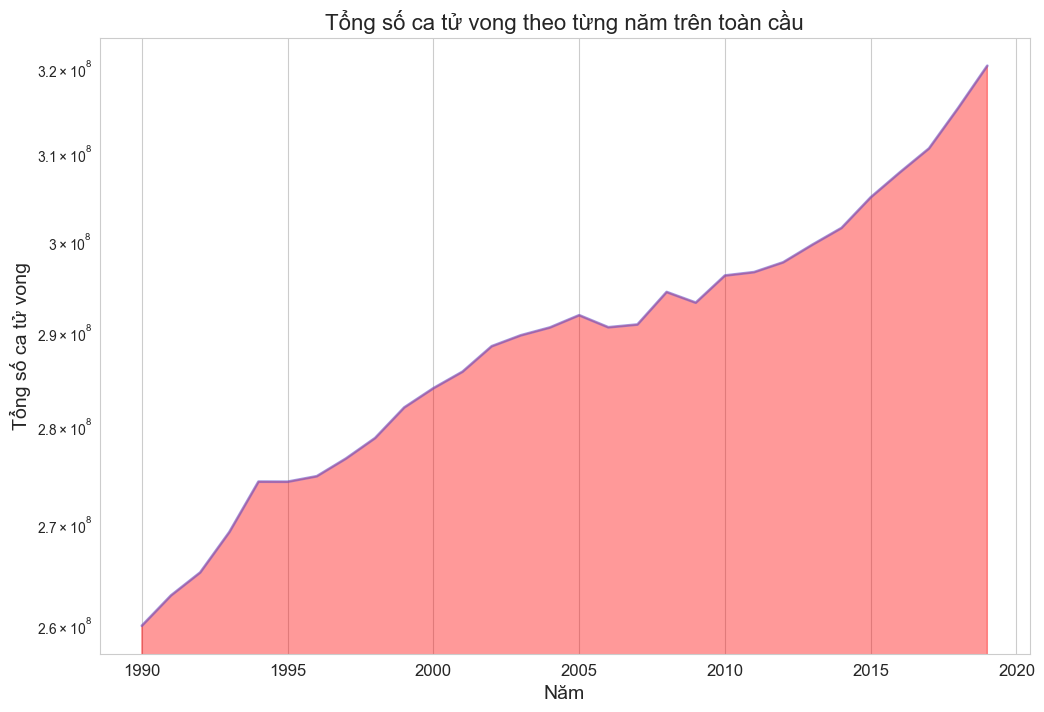

In [34]:
numeric_columns = df.select_dtypes(include=["int64"]).columns

# Tiếp tục tính tổng số ca tử vong theo từng năm và vẽ biểu đồ
total_deaths_per_year = df.copy().drop(['Entity', 'Code'], axis=1)[numeric_columns]\
                                    .apply(pd.to_numeric, errors='coerce')\
                                    .groupby('Year')\
                                    .sum().sum(axis=1)

plt.figure(figsize=(12, 8))
plt.fill_between(total_deaths_per_year.index, total_deaths_per_year.values, color="red", alpha=0.4)
plt.plot(total_deaths_per_year.index, total_deaths_per_year.values, color="Slateblue", alpha=0.6, linewidth=2)
plt.yscale('log')  # Scale logarithmic cho trục y
plt.title('Tổng số ca tử vong theo từng năm trên toàn cầu', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tổng số ca tử vong', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

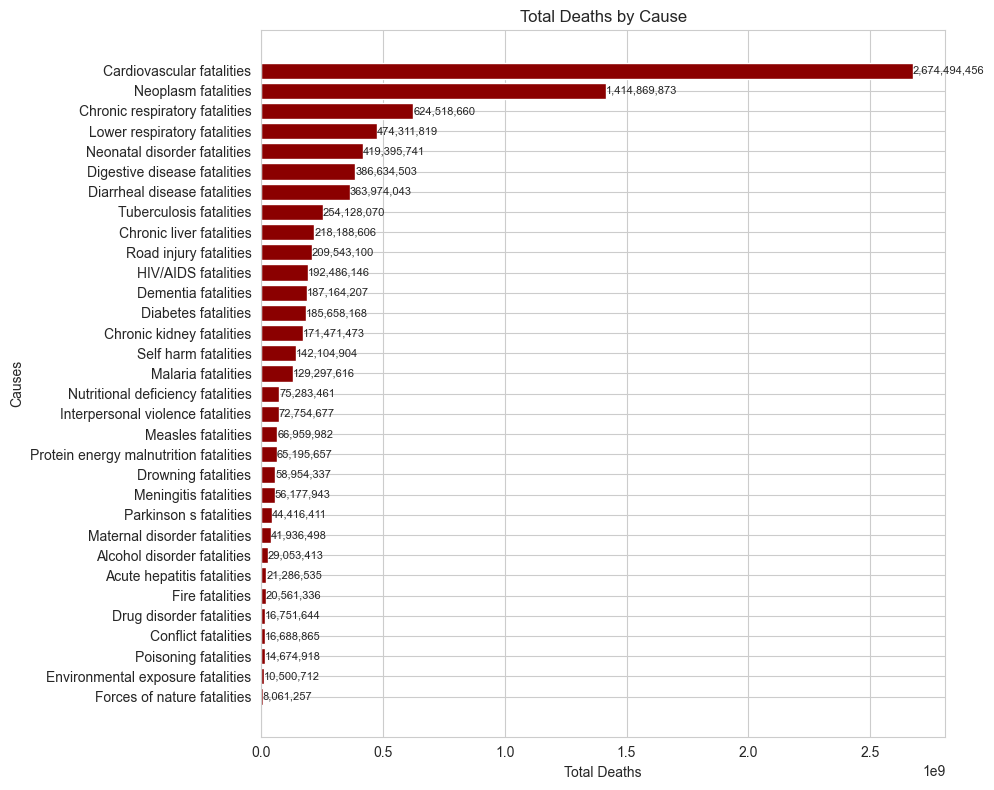

In [35]:
# Lấy dữ liệu từ DataFrame, loại bỏ các cột không cần thiết
df_causes = df.drop(['Entity', 'Code', 'Year'], axis=1)

# Tính tổng số lượng người chết theo từng loại nguyên nhân và sắp xếp giảm dần
total_deaths_by_cause = df_causes.sum().sort_values(ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 8))
bars = plt.barh(total_deaths_by_cause.index, total_deaths_by_cause.values, color='darkred')

# Hiển thị con số chính xác trên mỗi cột
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             '{:,}'.format(int(bar.get_width())), 
             va='center', ha='left', fontsize=8)

plt.title('Total Deaths by Cause')
plt.xlabel('Total Deaths')
plt.ylabel('Causes')
plt.tight_layout()
plt.show()

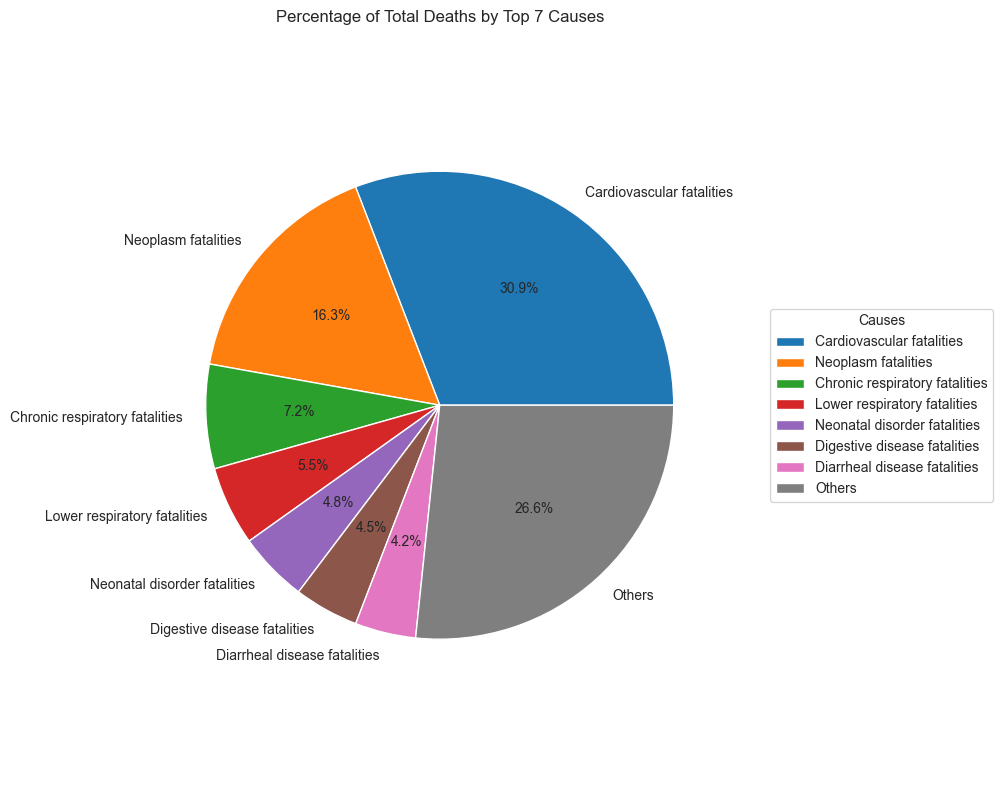

In [36]:


# Lấy 7 nguyên nhân có số lượng ca tử vong lớn nhất
top_7_causes = total_deaths_by_cause.nlargest(7)

# Tính tổng số lượng ca tử vong của các nguyên nhân còn lại
other_causes_total_deaths = total_deaths_by_cause.drop(top_7_causes.index).sum()

# Gộp các nguyên nhân còn lại thành một nhóm "Others"
top_7_causes['Others'] = other_causes_total_deaths

# Vẽ biểu đồ tròn

plt.figure(figsize=(10, 8))
plt.pie(top_7_causes, labels=top_7_causes.index, autopct='%1.1f%%', startangle=0)
plt.title('Percentage of Total Deaths by Top 7 Causes')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.legend(title="Causes", loc="center left", bbox_to_anchor=(1, 0, 0.7, 1))
plt.tight_layout()
plt.show()

In [37]:
vietnam_data = df[df["Code"]=="VNM"]
print(vietnam_data)

       Entity Code  Year  Meningitis fatalities  Dementia fatalities  \
6510  Vietnam  VNM  1990                   2049                 7765   
6511  Vietnam  VNM  1991                   2078                 7880   
6512  Vietnam  VNM  1992                   1939                 8002   
6513  Vietnam  VNM  1993                   1829                 8138   
6514  Vietnam  VNM  1994                   1757                 8300   
6515  Vietnam  VNM  1995                   1659                 8482   
6516  Vietnam  VNM  1996                   1570                 8675   
6517  Vietnam  VNM  1997                   1466                 8882   
6518  Vietnam  VNM  1998                   1542                 9103   
6519  Vietnam  VNM  1999                   1348                 9350   
6520  Vietnam  VNM  2000                   1297                 9640   
6521  Vietnam  VNM  2001                   1264                 9990   
6522  Vietnam  VNM  2002                   1241                1

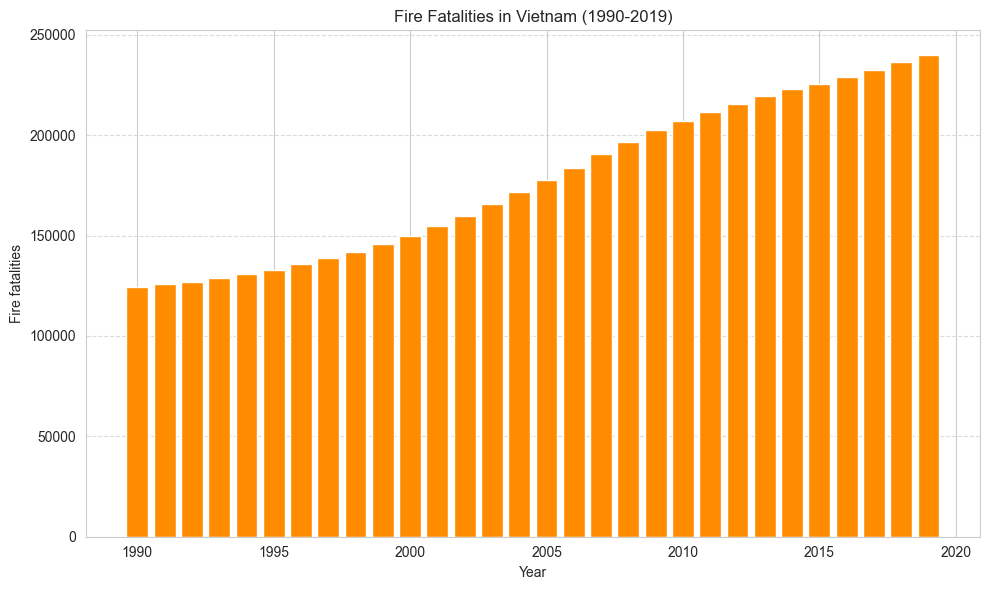

In [44]:
# Lấy dữ liệu của các vụ cháy (Fire fatalities)
fire_fatalities = vietnam_data["Cardiovascular fatalities"]

# Lấy dữ liệu của các năm
years = vietnam_data["Year"]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(years, fire_fatalities, color='darkorange')
plt.xlabel("Year")
plt.ylabel("Fire fatalities")
plt.title("Fire Fatalities in Vietnam (1990-2019)")
plt.xticks(rotation=0)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hiển thị lưới cho trục y
plt.tight_layout()  # Đảm bảo layout của biểu đồ được hiển thị đầy đủ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_79632\3872053685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_79632\3872053685.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Cardiovascular fatalities', hue='Entity', ci=None)


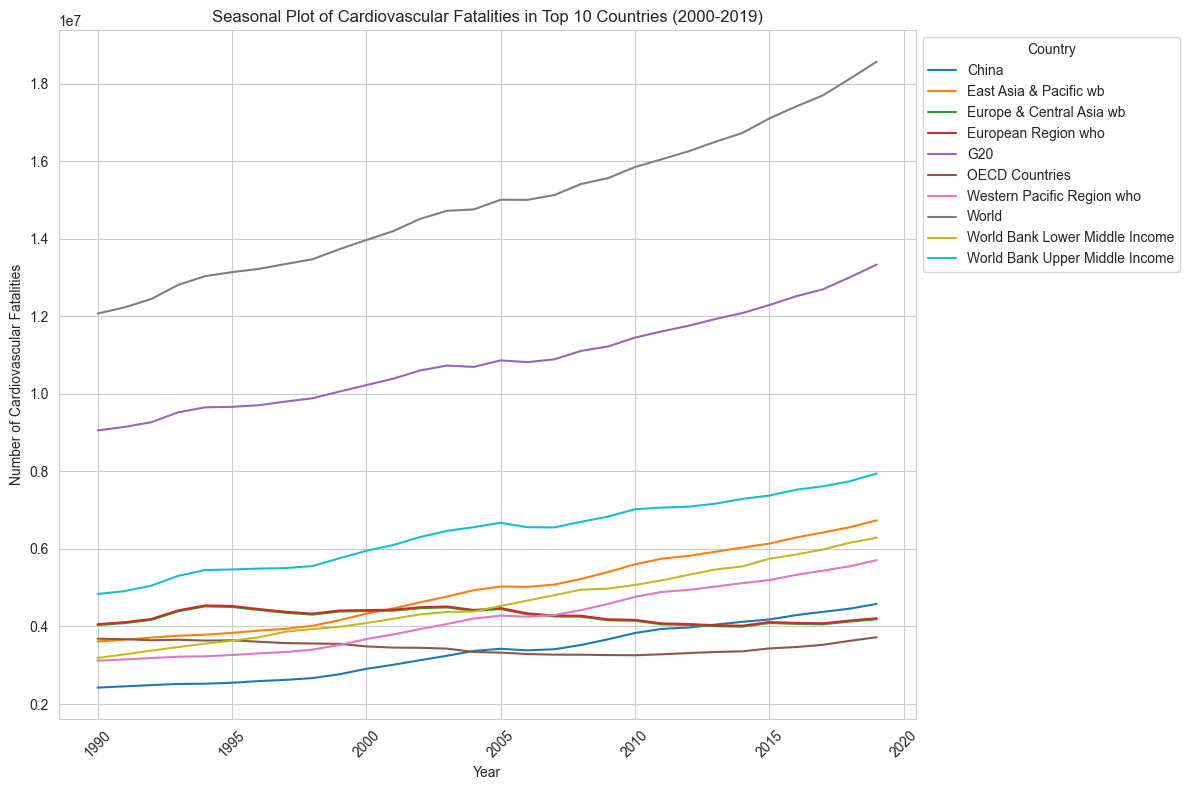

In [39]:

# Lấy 10 quốc gia có số ca Cardiovascular fatalities cao nhất
top_countries = df.groupby('Entity')['Cardiovascular fatalities'].sum().nlargest(10).index

# Lọc dữ liệu cho các quốc gia đó từ năm 2000 đến 2019
data = df[(df['Year'] >= 1990) & (df['Year'] <= 2019) & df['Entity'].isin(top_countries)]

# Chuyển cột 'Year' thành kiểu dữ liệu số nguyên
data['Year'] = data['Year'].astype(int)

# Tạo Seasonal Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Year', y='Cardiovascular fatalities', hue='Entity', ci=None)
plt.title('Seasonal Plot of Cardiovascular Fatalities in Top 10 Countries (2000-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Cardiovascular Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

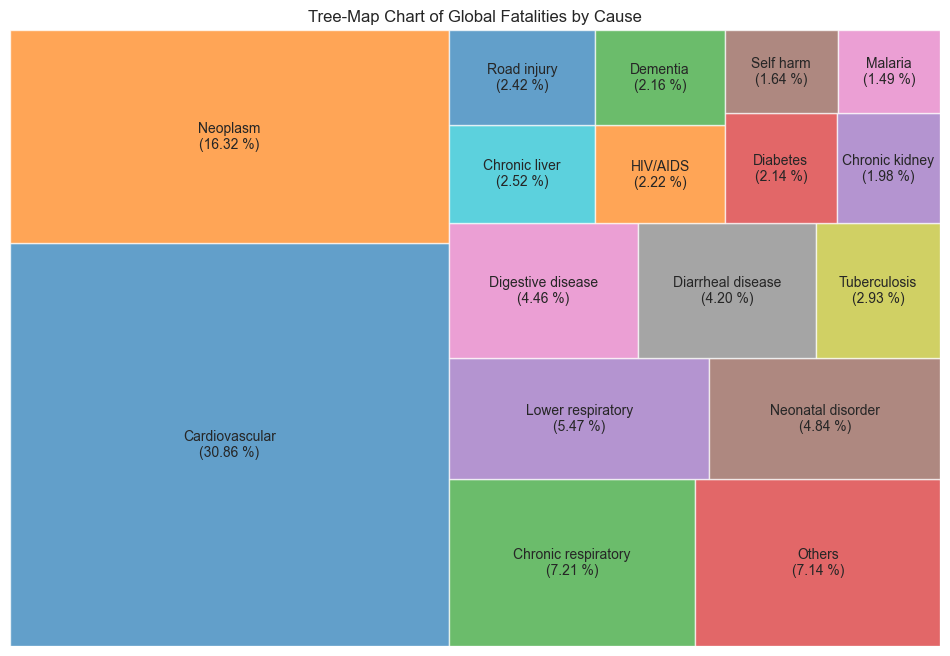

In [40]:
import squarify
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Calculate total number of deaths
total_deaths = total_deaths_by_cause.sum()

# Calculate percentages and filter causes with less than 1%
percentages = total_deaths_by_cause / total_deaths * 100
filtered_percentages = percentages[percentages >= 1]

# Calculate the percentage of "others"
others_percentage = percentages[percentages < 1].sum()

# Create a modified dictionary with only top causes and "others"
modified_deaths_by_cause = filtered_percentages.to_dict()
modified_deaths_by_cause['Others'] = others_percentage

# Sort the modified dictionary by values in descending order
sorted_modified_deaths_by_cause = dict(sorted(modified_deaths_by_cause.items(), key=lambda item: item[1], reverse=True))

# Modify labels to include "Others"
labels = [f"{str(cause).replace(' fatalities','')}\n({percent:.2f} %)" if cause != 'Others' else f"Others\n({percent:.2f} %)" for cause, percent in sorted_modified_deaths_by_cause.items()]

# Vẽ Tree-Map chart với số phần trăm trên từng hình chữ nhật
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sorted_modified_deaths_by_cause.values(), label=labels, alpha=0.7, color=colors)
plt.title('Tree-Map Chart of Global Fatalities by Cause')
plt.axis('off')  # Ẩn các trục
plt.show()

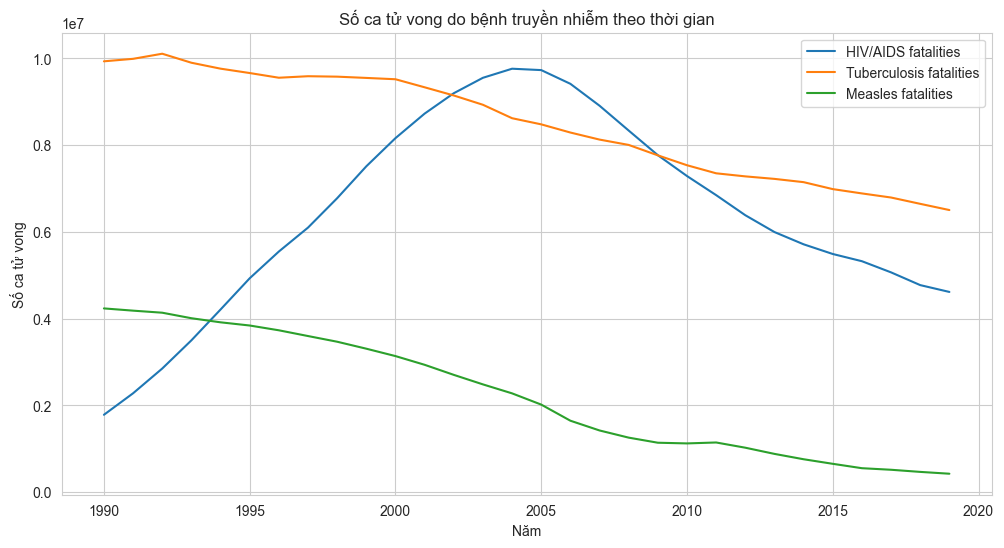

In [41]:
# Chọn các cột liên quan đến bệnh truyền nhiễm
infectious_diseases = ['HIV/AIDS fatalities', 'Tuberculosis fatalities', 'Measles fatalities']

# Tính tổng số ca tử vong do từng loại bệnh truyền nhiễm theo năm
df_infectious = df.groupby('Year')[infectious_diseases].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for disease in infectious_diseases:
    plt.plot(df_infectious.index, df_infectious[disease], label=disease)

plt.xlabel('Năm')
plt.ylabel('Số ca tử vong')
plt.title('Số ca tử vong do bệnh truyền nhiễm theo thời gian')
plt.legend()
plt.grid(True)
plt.show()

# Dựa vào biểu đồ trên, ta có thể thấy được:

- HIV/AIDS: Số ca tử vong do HIV/AIDS tăng mạnh từ năm 1990 đến khoảng năm 2005, sau đó giảm dần nhưng vẫn duy trì ở mức cao. Điều này cho thấy rằng HIV/AIDS là một vấn đề lớn và cần được giải quyết một cách hiệu quả.

- Lao: Số ca tử vong do lao tăng nhẹ từ năm 1990 đến khoảng năm 2000, sau đó giảm dần và duy trì mức thấp. Điều này cho thấy rằng các biện pháp y tế và tiếp cận điều trị có thể đã góp phần làm giảm số ca tử vong do lao.

- Sởi: Số ca tử vong do sởi giảm liên tục từ năm 1990 và duy trì mức rất thấp vào khoảng năm 2020. Điều này cho thấy rằng các chương trình tiêm chủng có thể đã giúp kiểm soát bệnh sởi một cách hiệu quả.

Tóm lại, biểu đồ cho thấy rằng HIV/AIDS là nguyên nhân chính gây ra số lượng lớn các ca tử vong trong giai đoạn này. Trong khi đó, số ca tử vong do lao và sởi đã giảm đáng kể, có thể do sự cải thiện trong việc tiếp cận điều trị và các chương trình tiêm chủng. Tuy nhiên, cần phải tiếp tục theo dõi để hiểu rõ hơn về xu hướng của HIV/AIDS trong tương lai.

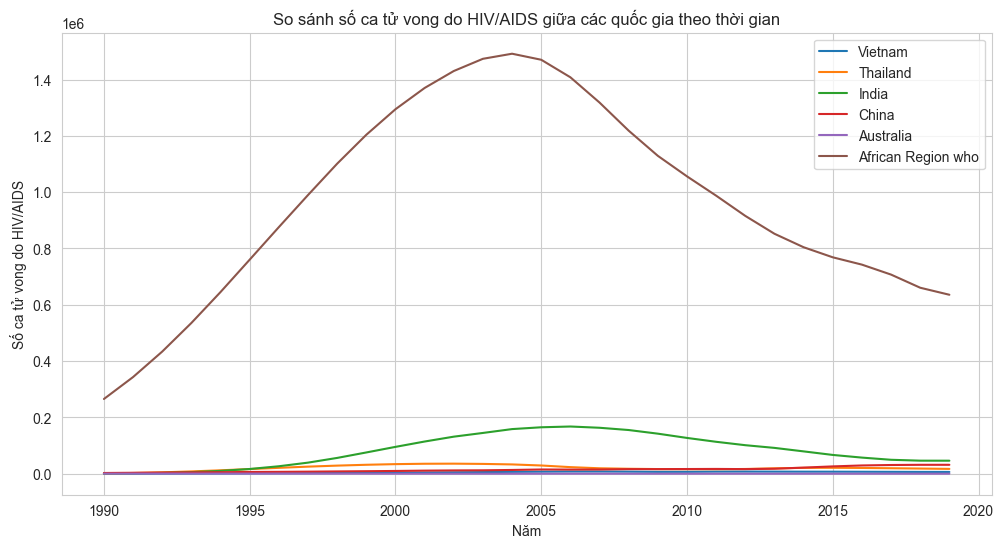

In [42]:
countries = ['Vietnam', 'Thailand', 'India', 'China','Australia','African Region who']

# Chọn nguyên nhân gây tử vong cần phân tích
cause_of_death = 'HIV/AIDS fatalities'

# Tạo DataFrame mới chứa thông tin cần thiết
df_selected = df[df['Entity'].isin(countries) & (df['Year'] >= 1990)]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_selected[df_selected['Entity'] == country]
    plt.plot(data['Year'], data[cause_of_death], label=country)

plt.xlabel('Năm')
plt.ylabel('Số ca tử vong do HIV/AIDS')
plt.title('So sánh số ca tử vong do HIV/AIDS giữa các quốc gia theo thời gian')
plt.legend()
plt.grid(True)
plt.show()